In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import MinMaxScaler



In [108]:
#Load the dataset
df = pd.read_csv(r"D:\bank-full.csv", sep=";")

In [109]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [111]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


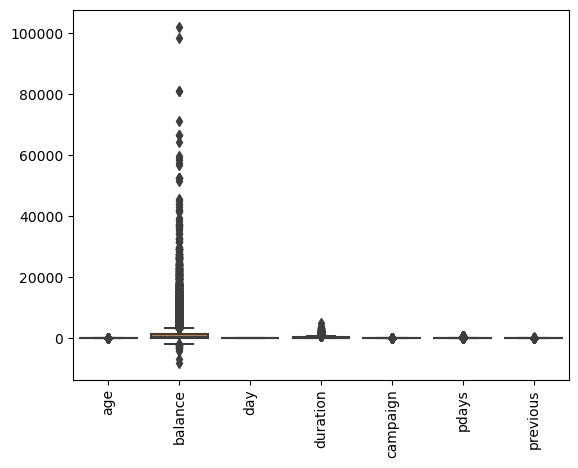

In [112]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [113]:
df["age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: age
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


In [114]:
df["age"].value_counts().head(15)

32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

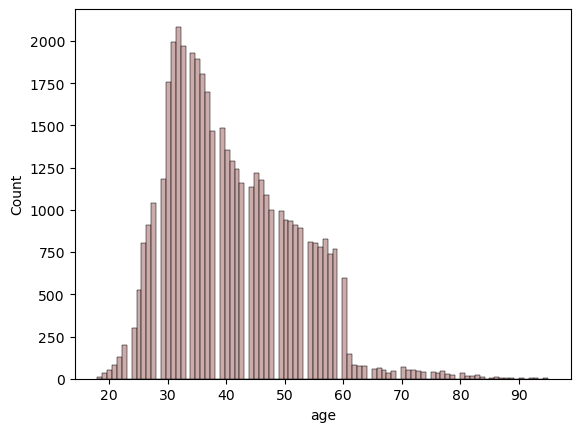

In [115]:
sns.histplot(x="age",data=df ,color = 'rosybrown')

In [116]:
df["job"].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [117]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

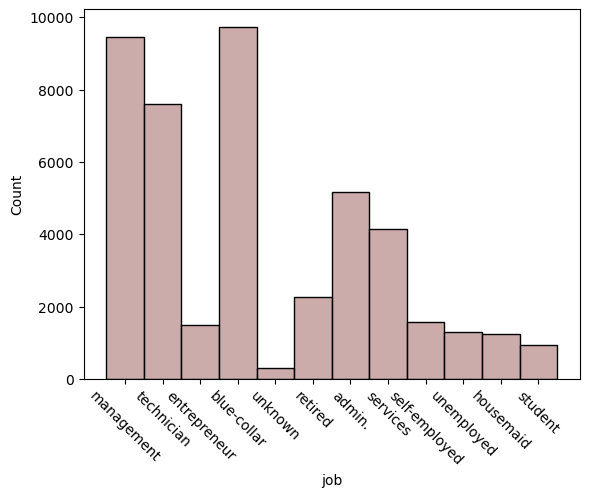

In [118]:
sns.histplot(x="job", data=df, color='rosybrown')
plt.xticks(rotation=-45)
plt.show()

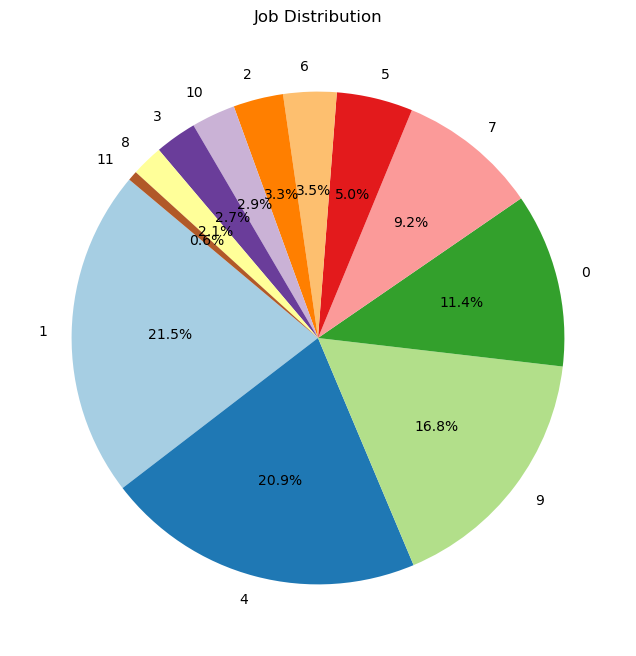

In [176]:
job_counts = df['job'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Job Distribution')
plt.show()

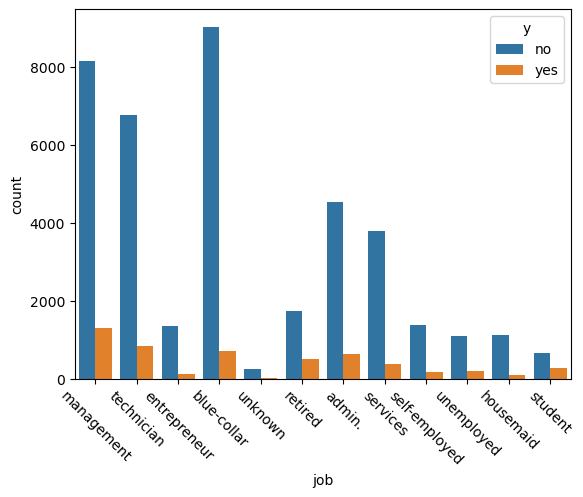

In [120]:

sns.countplot(x="job", data=df, hue="y")
plt.xticks(rotation=-45)
plt.show()

<Axes: xlabel='marital', ylabel='count'>

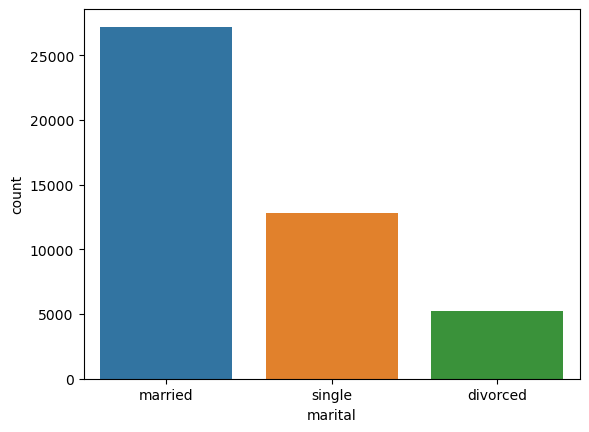

In [121]:
sns.countplot(x="marital", data=df)

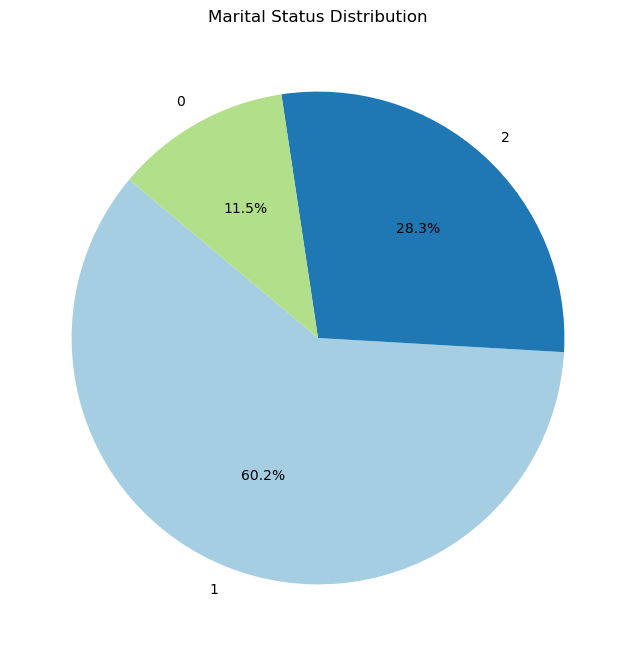

In [177]:
marital_counts = df['marital'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Marital Status Distribution')
plt.show()

<Axes: xlabel='marital', ylabel='count'>

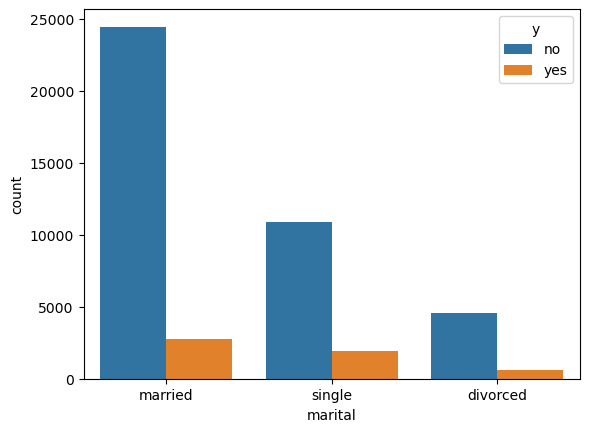

In [123]:
sns.countplot(x="marital", data=df, hue="y")
    


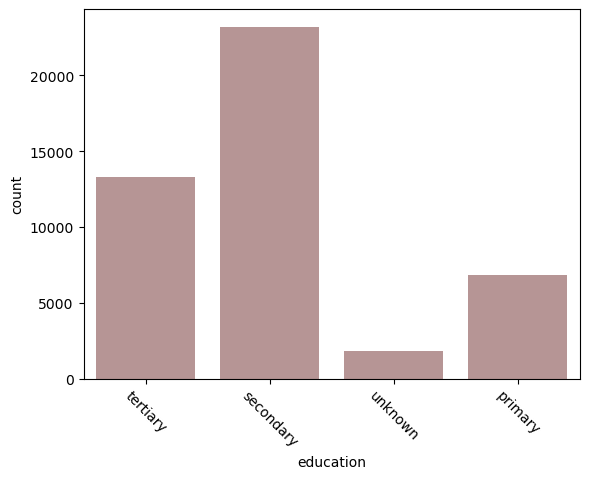

In [124]:
sns.countplot(x="education", data=df, color='rosybrown')
plt.xticks(rotation=-45)
plt.show()

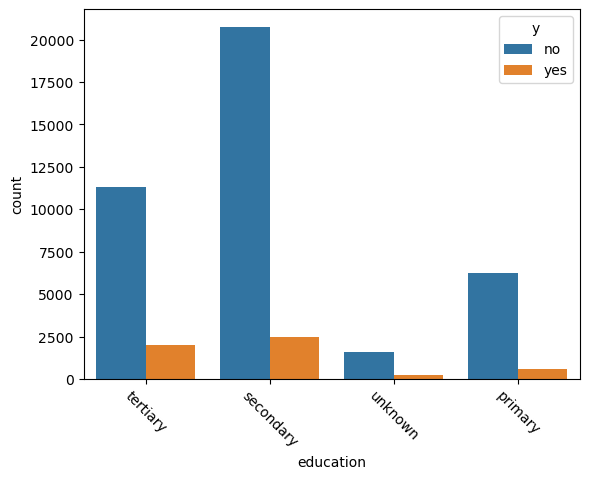

In [125]:
sns.countplot(x="education", data=df, hue="y")
plt.xticks(rotation=-45)
plt.show()

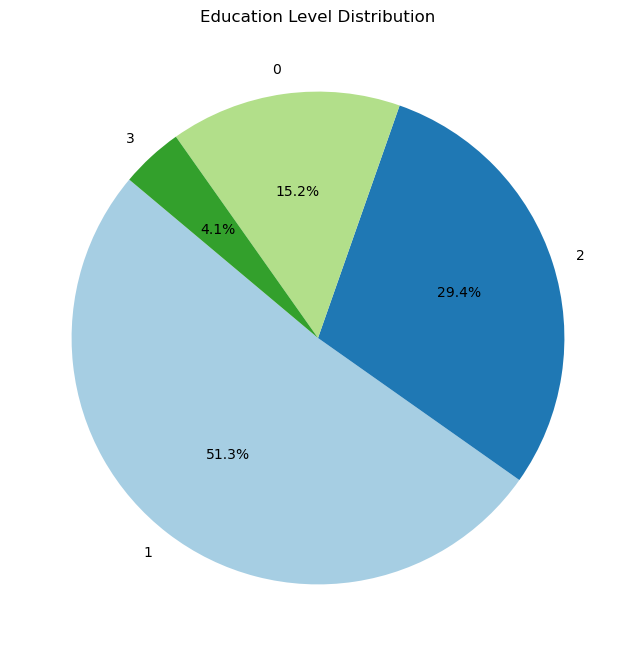

In [178]:
education_counts = df['education'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Education Level Distribution')
plt.show()

In [127]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='count'>

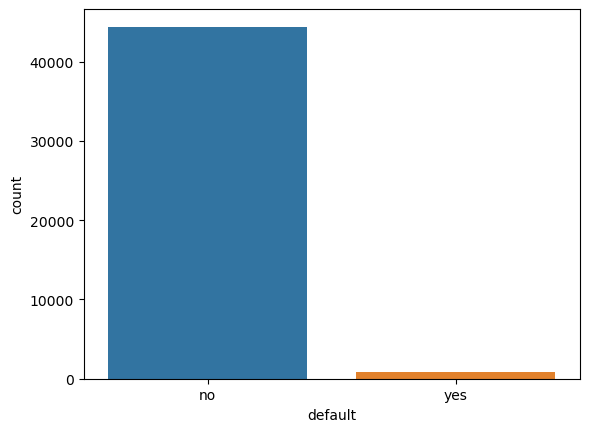

In [128]:
sns.countplot(x="default", data=df)

<Axes: xlabel='default', ylabel='count'>

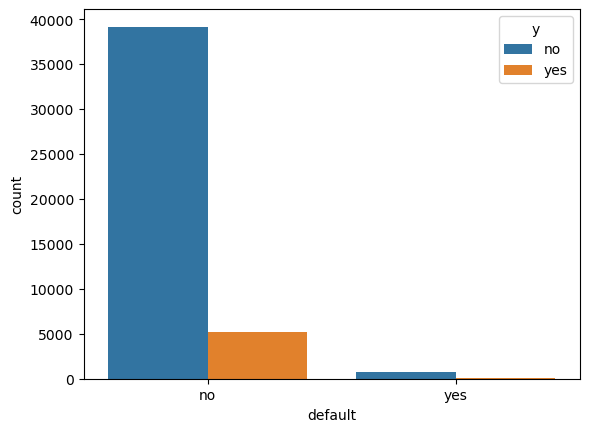

In [129]:
sns.countplot(x="default", data=df, hue="y")

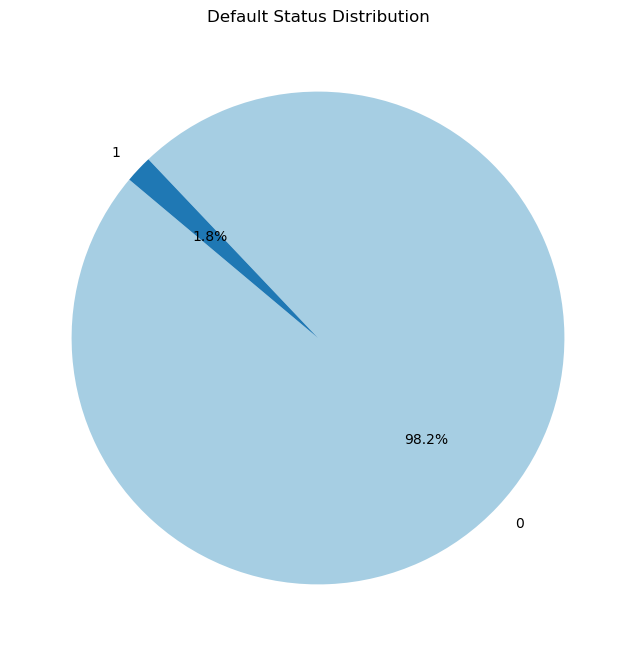

In [179]:
default_counts = df['default'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Default Status Distribution')
plt.show()

In [131]:
df["balance"].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: ylabel='balance'>

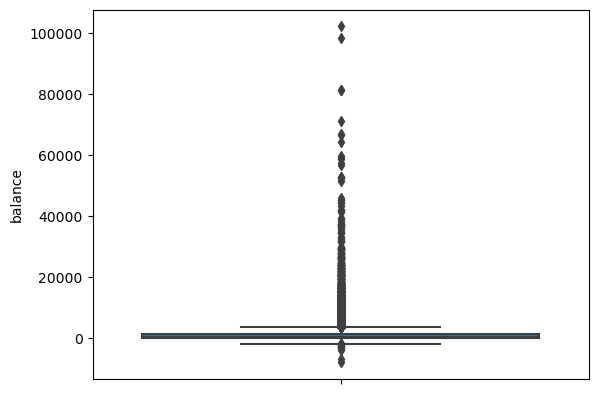

In [132]:
sns.boxplot(y="balance",data=df)

In [133]:
df.loc[df["balance"] > 40000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
920,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,no
3197,43,admin.,single,secondary,no,56831,no,no,unknown,15,may,243,1,-1,0,unknown,no
9425,59,housemaid,divorced,secondary,no,45141,no,no,unknown,6,jun,42,1,-1,0,unknown,no
9536,58,entrepreneur,married,primary,no,52499,no,no,unknown,6,jun,198,2,-1,0,unknown,no
12926,56,blue-collar,married,secondary,no,58932,no,no,telephone,7,jul,339,2,-1,0,unknown,no
13154,56,entrepreneur,married,tertiary,no,51439,no,yes,cellular,8,jul,325,1,-1,0,unknown,no
15869,38,admin.,single,tertiary,no,45789,no,no,telephone,21,jul,21,31,-1,0,unknown,no
19410,55,entrepreneur,married,tertiary,no,41923,no,no,cellular,6,aug,69,3,-1,0,unknown,no
19420,59,admin.,married,unknown,no,64343,no,no,cellular,6,aug,45,4,-1,0,unknown,no


In [134]:
df.drop(df[df["balance"] > 40000].index, inplace=True)

<Axes: xlabel='balance', ylabel='Density'>

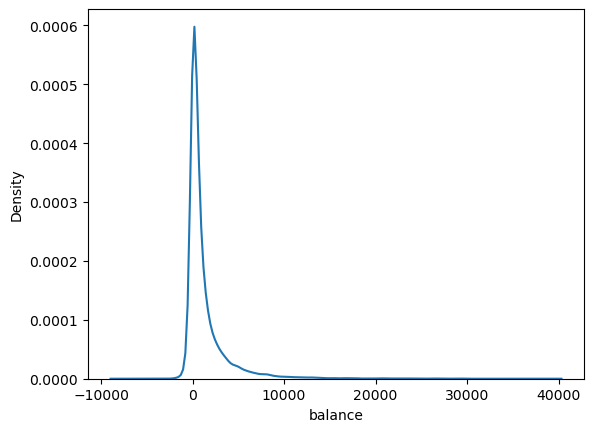

In [135]:
sns.kdeplot(x="balance",data =df)

<Axes: xlabel='balance', ylabel='Density'>

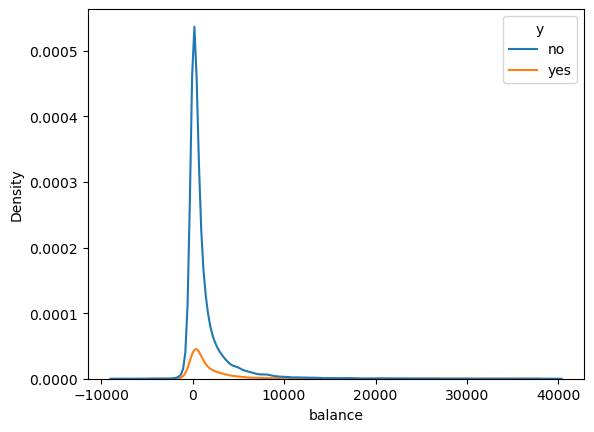

In [136]:
sns.kdeplot(x="balance",data =df,hue="y")

In [137]:
df["housing"].value_counts()

yes    25126
no     20057
Name: housing, dtype: int64

<Axes: xlabel='housing', ylabel='count'>

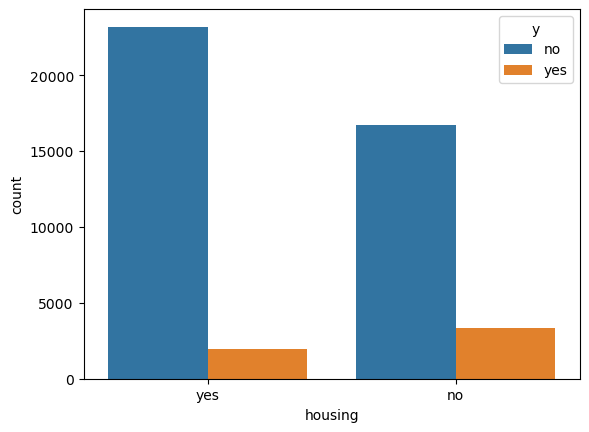

In [138]:
sns.countplot(x="housing", data=df, hue="y")

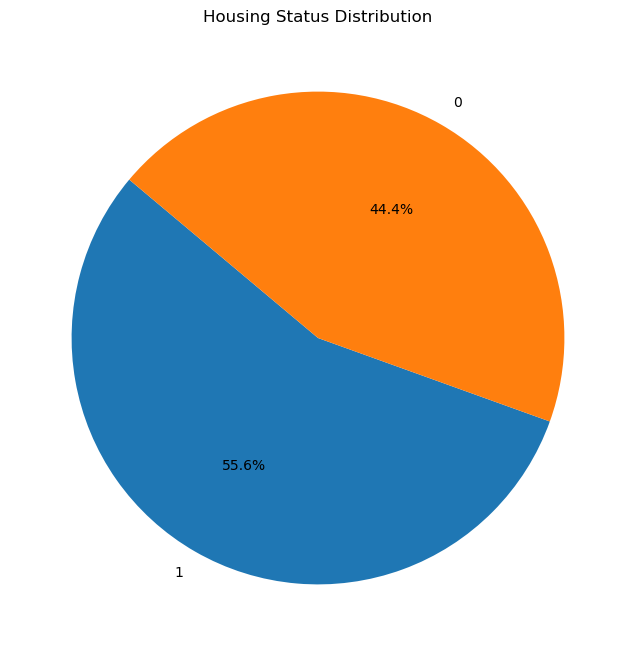

In [181]:
housing_counts = df['housing'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Housing Status Distribution')
plt.show()

In [140]:
df['loan'].value_counts()

no     37940
yes     7243
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

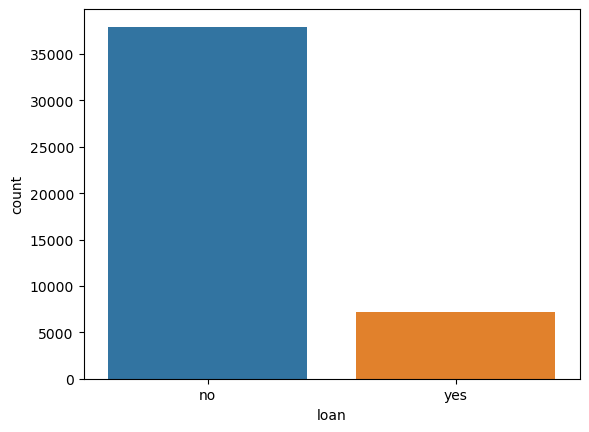

In [141]:
sns.countplot(x="loan", data=df)

<Axes: xlabel='loan', ylabel='count'>

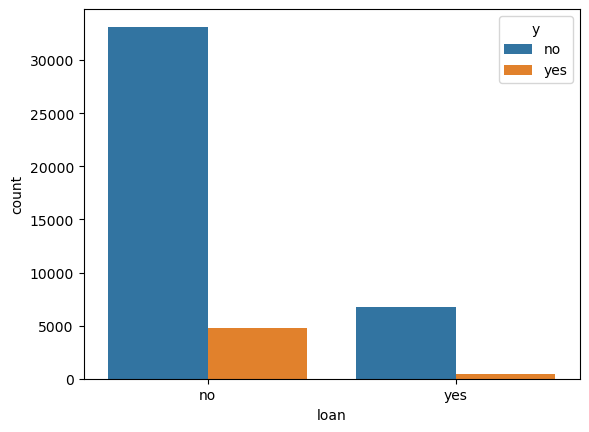

In [142]:
sns.countplot(x="loan", data=df, hue="y")

In [143]:
df["duration"].info()

<class 'pandas.core.series.Series'>
Int64Index: 45183 entries, 0 to 45210
Series name: duration
Non-Null Count  Dtype
--------------  -----
45183 non-null  int64
dtypes: int64(1)
memory usage: 706.0 KB


In [144]:
df["duration"].describe()

count    45183.000000
mean       258.167297
std        257.497081
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Density'>

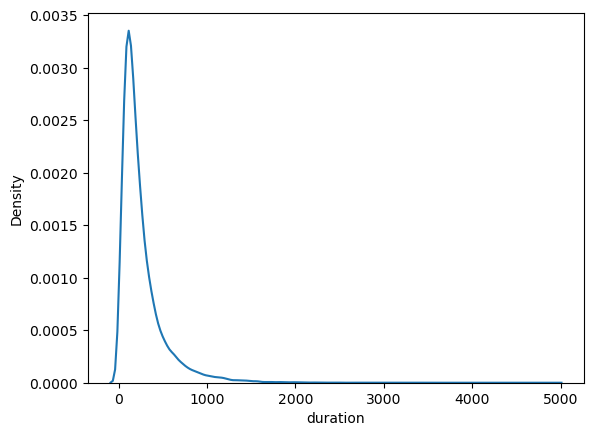

In [145]:
sns.kdeplot(x="duration",data =df)

<Axes: xlabel='duration', ylabel='Density'>

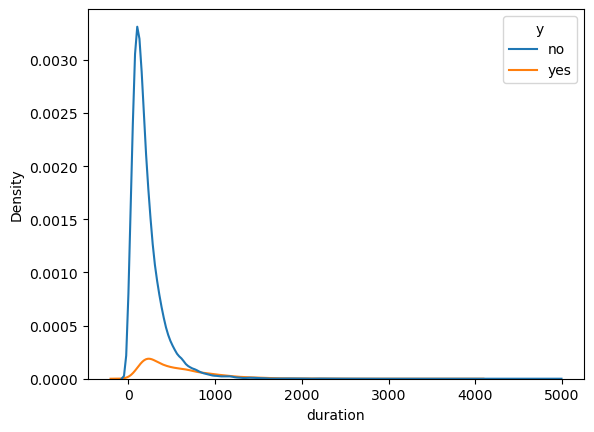

In [146]:
sns.kdeplot(x="duration",data =df,hue ="y")

In [147]:
df["campaign"].info()

<class 'pandas.core.series.Series'>
Int64Index: 45183 entries, 0 to 45210
Series name: campaign
Non-Null Count  Dtype
--------------  -----
45183 non-null  int64
dtypes: int64(1)
memory usage: 706.0 KB


In [148]:
df["campaign"].value_counts()

1     17532
2     12499
3      5517
4      3520
5      1763
6      1290
7       735
8       540
9       327
10      266
11      200
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       11
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

<Axes: xlabel='campaign', ylabel='Density'>

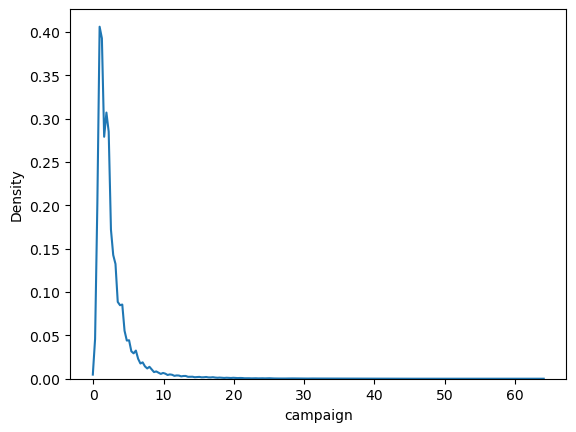

In [149]:
sns.kdeplot(data=df,x="campaign")

<Axes: xlabel='campaign', ylabel='Density'>

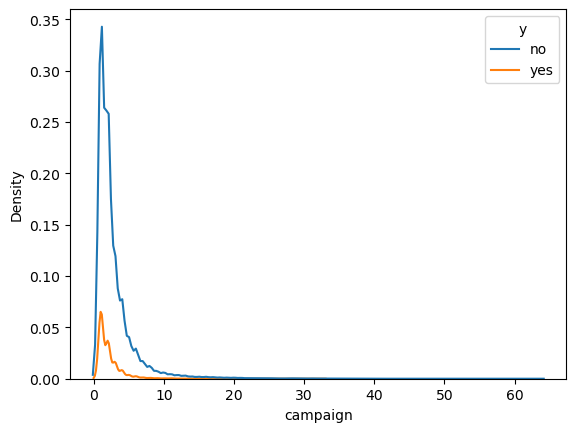

In [150]:
sns.kdeplot(data=df,x="campaign",hue="y")

In [151]:
df["poutcome"].info()

<class 'pandas.core.series.Series'>
Int64Index: 45183 entries, 0 to 45210
Series name: poutcome
Non-Null Count  Dtype 
--------------  ----- 
45183 non-null  object
dtypes: object(1)
memory usage: 706.0+ KB


In [152]:
df["poutcome"].describe()

count       45183
unique          4
top       unknown
freq        36934
Name: poutcome, dtype: object

In [153]:
df["poutcome"].value_counts()

unknown    36934
failure     4901
other       1839
success     1509
Name: poutcome, dtype: int64

<Axes: xlabel='poutcome', ylabel='count'>

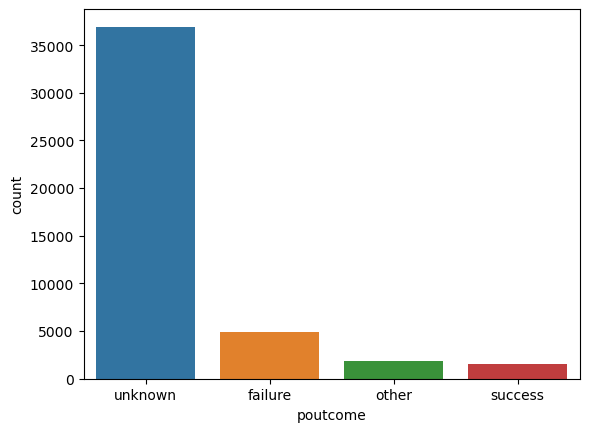

In [154]:
sns.countplot(x="poutcome", data=df)

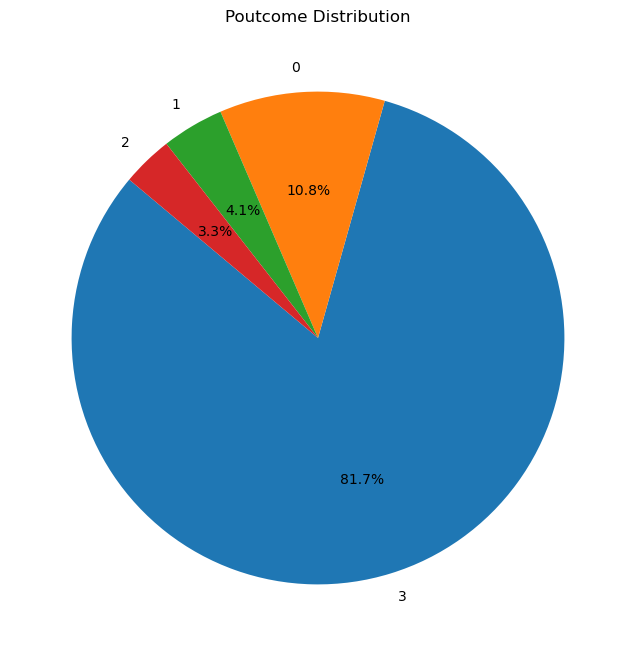

In [183]:
poutcome_counts = df['poutcome'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(poutcome_counts, labels=poutcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Poutcome Distribution')
plt.show()

<Axes: xlabel='poutcome', ylabel='count'>

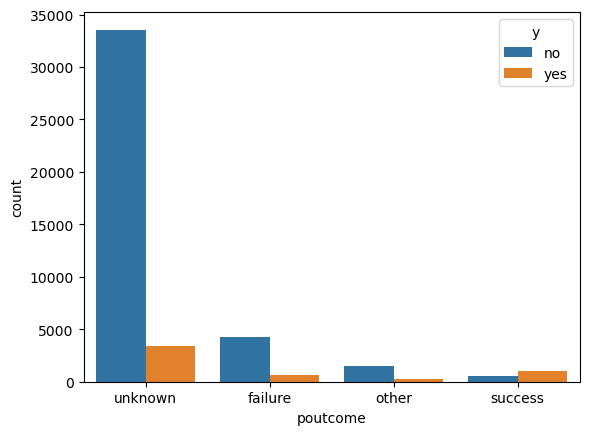

In [156]:
sns.countplot(x="poutcome", data=df, hue="y")

In [157]:
df['y'].info()

<class 'pandas.core.series.Series'>
Int64Index: 45183 entries, 0 to 45210
Series name: y
Non-Null Count  Dtype 
--------------  ----- 
45183 non-null  object
dtypes: object(1)
memory usage: 706.0+ KB


In [158]:
df['y'].describe()

count     45183
unique        2
top          no
freq      39899
Name: y, dtype: object

In [159]:
df['y'].value_counts()

no     39899
yes     5284
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

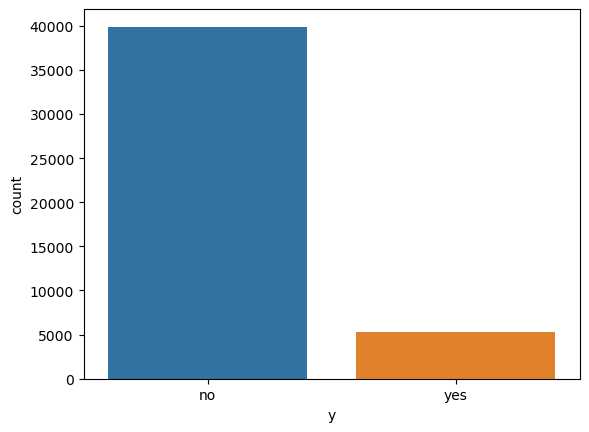

In [160]:
sns.countplot(data=df ,x="y")

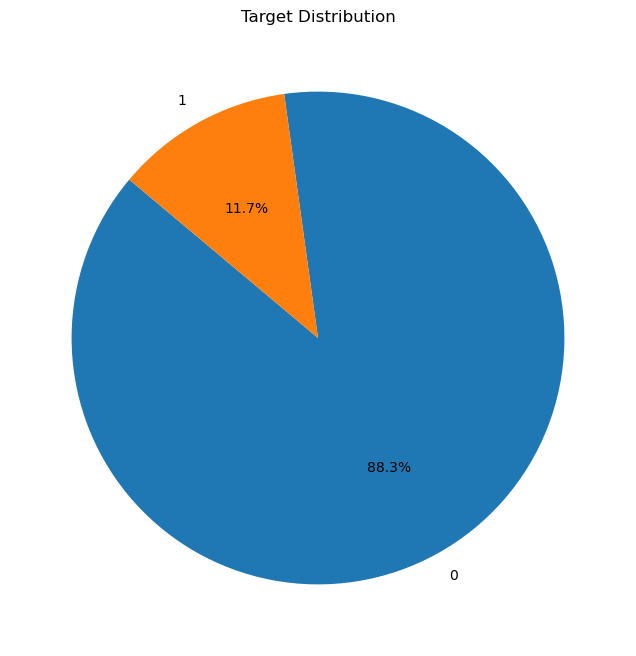

In [185]:
target_counts = df['y'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Target Distribution')
plt.show()

<Axes: >

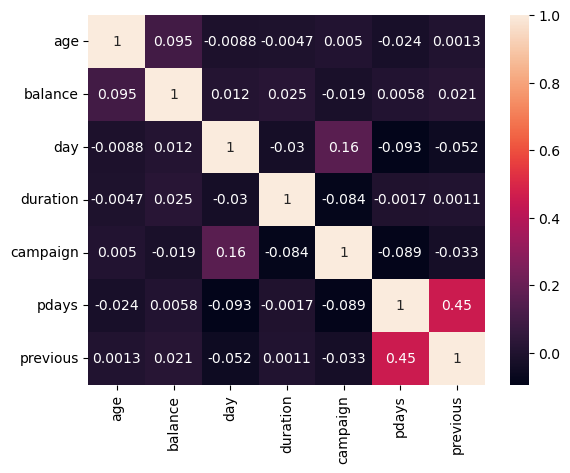

In [162]:
sns.heatmap(df.corr(),annot =True)

In [163]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

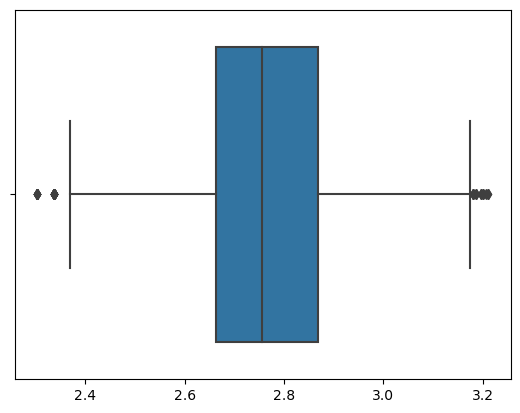

In [164]:
from scipy import stats
xt, _ = stats.boxcox(df['age'])
sns.boxplot(data=df, x=xt,orient='h')

In [165]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])

In [166]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [167]:
x=df.drop('y',axis=1)
y=df['y']

In [168]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[['balance','duration','age','day']] = scaler.fit_transform(x[['balance','duration','age','day']])
x[['balance','duration','age','day']]

,balance,duration,age,day
0,0.214370,0.053070,0.519481,0.133333
1,0.169775,0.030704,0.337662,0.133333
2,0.169205,0.015453,0.194805,0.133333
3,0.200932,0.018707,0.376623,0.133333
4,0.169184,0.040260,0.194805,0.133333
...,...,...,...,...
45206,0.186567,0.198658,0.428571,0.533333
45207,0.205637,0.092721,0.688312,0.533333
45208,0.289722,0.229158,0.701299,0.533333
45209,0.183255,0.103294,0.506494,0.533333


In [169]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state=42)

In [170]:

models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN_Bagging': BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42),
    'LogReg_Bagging': BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'), n_estimators=10, random_state=42),
    'Stacking': StackingClassifier(classifiers=[
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        XGBClassifier()
    ],
    meta_classifier=LogisticRegression(solver='liblinear'),
    use_probas=True, average_probas=False),
    'Voting': VotingClassifier(estimators=[
        ('RandomForest', RandomForestClassifier()),
        ('GradientBoosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('XGBoost', XGBClassifier())
    ])
}

param_ranges = {
    'RandomForest': {
        'n_estimators': range(10, 201),
        'max_depth': [None] + list(range(10, 31)),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9),
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 9)
    },
    'AdaBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
    },
    'XGBoost': {
        'n_estimators': range(10, 201),
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': range(1, 9),
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'KNN_Bagging': {
        'base_estimator__n_neighbors': range(3, 21),
        'base_estimator__weights': ['uniform', 'distance'],
        'base_estimator__p': [1, 2],
        'n_estimators': range(5, 16),
        'max_samples': [0.8, 1.0],
        'max_features': [0.8, 1.0]
    },
    'LogReg_Bagging': {
        'base_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'base_estimator__penalty': ['l1', 'l2'],
        'n_estimators': range(5, 16),
        'max_samples': [0.8, 1.0],
        'max_features': [0.8, 1.0]
    },
    'Stacking': {
        'meta_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'use_probas': [True],
        'average_probas': [False]
    },
    'Voting': {
        'voting': ['hard', 'soft']
    }
}

results_df = pd.DataFrame(columns=['Model', 'AUC_train', 'AUC_test', 'F1_train', 'F1_test', 'Accuracy_train', 'Accuracy_test', 'Precision_train', 'Precision_test', 'Recall_train', 'Recall_test'])

for model_name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_ranges[model_name],
                                       n_iter=10, scoring='roc_auc', n_jobs=-1, cv=StratifiedKFold(n_splits=5),
                                       random_state=42, verbose=2)

    random_search.fit(x_train, y_train)

    best_params = random_search.best_params_

    print(best_params)

    best_model = model.set_params(**best_params)
    best_model.fit(x_train, y_train)

    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)

    auc_train = roc_auc_score(y_train, best_model.predict_proba(x_train)[:, 1])
    auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)

    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results_df = results_df.append({'Model': model_name,
                                    'AUC_train': auc_train, 'AUC_test': auc_test,
                                    'F1_train': f1_train, 'F1_test': f1_test,
                                    'Accuracy_train': accuracy_train, 'Accuracy_test': accuracy_test,
                                    'Precision_train': precision_train, 'Precision_test': precision_test,
                                    'Recall_train': recall_train, 'Recall_test': recall_test}, ignore_index=True)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 192, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 17, 'bootstrap': True}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 189, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 193, 'learning_rate': 0.3}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 0.8, 'n_estimators': 138, 'min_child_weight': 8, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 15, 'max_samples': 0.8, 'max_features': 0.8, 'base_estimator__weights': 'distance', 'base_estimator__p': 1, 'base_estimator__n_neighbors': 12}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 15, 'max_samples': 1.0, 'max_features': 0.8, 'base_estimator__penalty': 'l

In [171]:
results_df

,Model,AUC_train,AUC_test,F1_train,F1_test,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test
0,RandomForest,0.969765,0.929329,0.656843,0.477952,0.935403,0.902532,0.863206,0.648649,0.530111,0.378378
1,GradientBoosting,0.962186,0.934312,0.685463,0.525805,0.936790,0.904834,0.816655,0.637433,0.590587,0.447447
2,AdaBoost,0.913189,0.912213,0.436303,0.422619,0.901024,0.896955,0.649650,0.622807,0.328441,0.319820
3,XGBoost,0.980263,0.932921,0.787296,0.545220,0.954938,0.906516,0.875736,0.639394,0.715081,0.475225
4,KNN_Bagging,0.999912,0.853384,0.938666,0.199353,0.986514,0.890492,0.999428,0.723005,0.884868,0.115616
5,LogReg_Bagging,0.872270,0.879359,0.247673,0.248521,0.890282,0.887571,0.618182,0.586592,0.154858,0.157658
6,Stacking,0.999230,0.934071,0.821583,0.389978,0.964677,0.900850,0.999637,0.710317,0.697368,0.268769
7,Voting,0.994458,0.935785,0.839577,0.515388,0.966890,0.906604,0.965155,0.663905,0.742915,0.421171


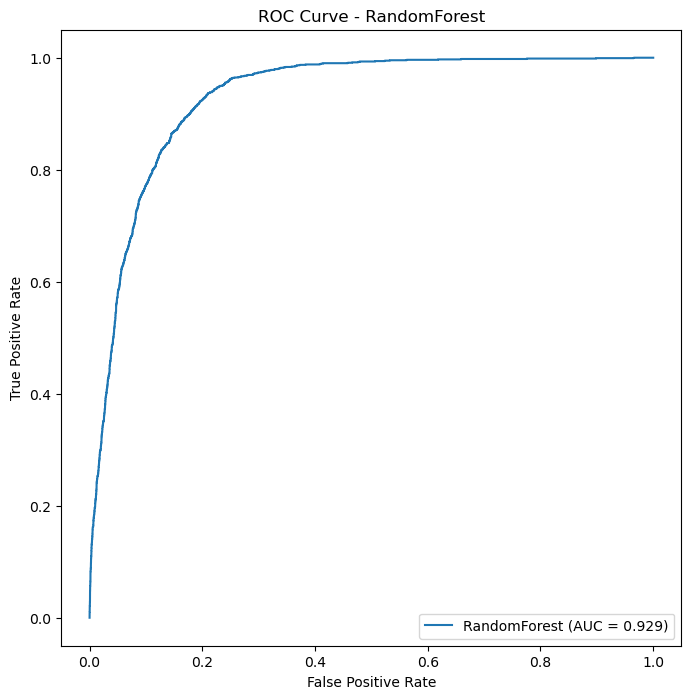

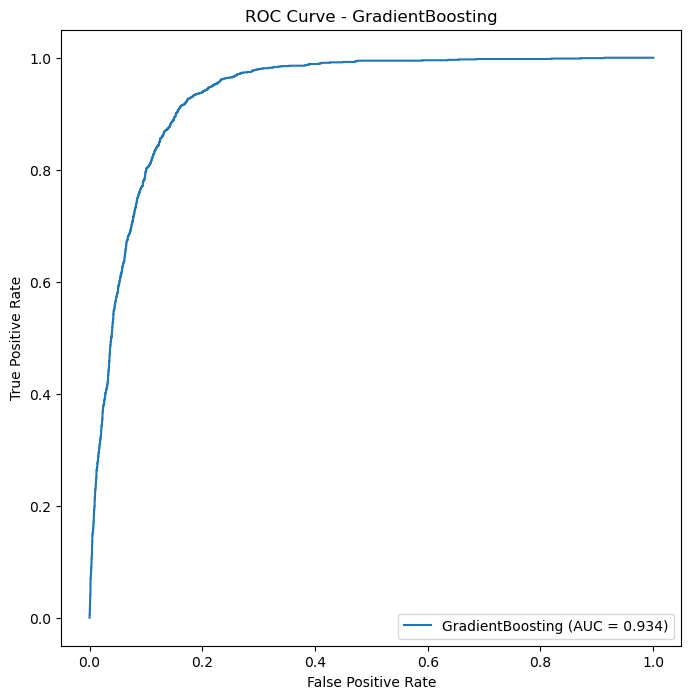

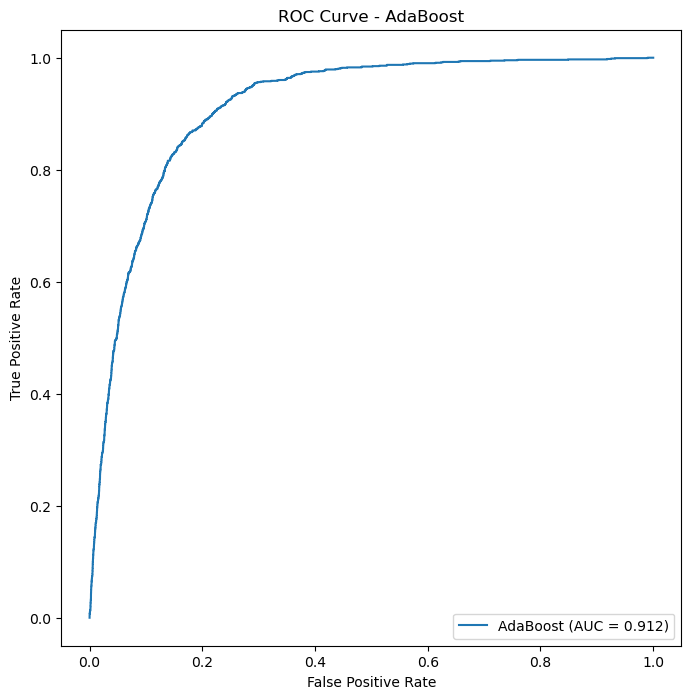

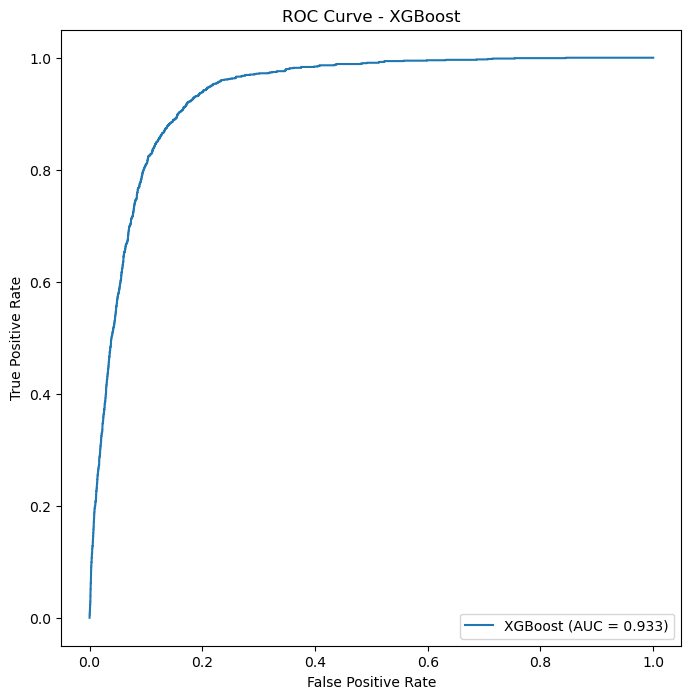

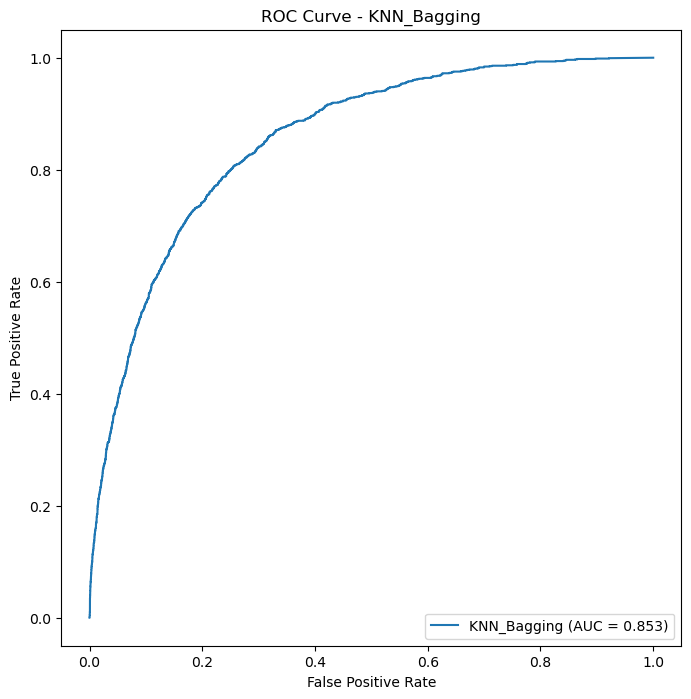

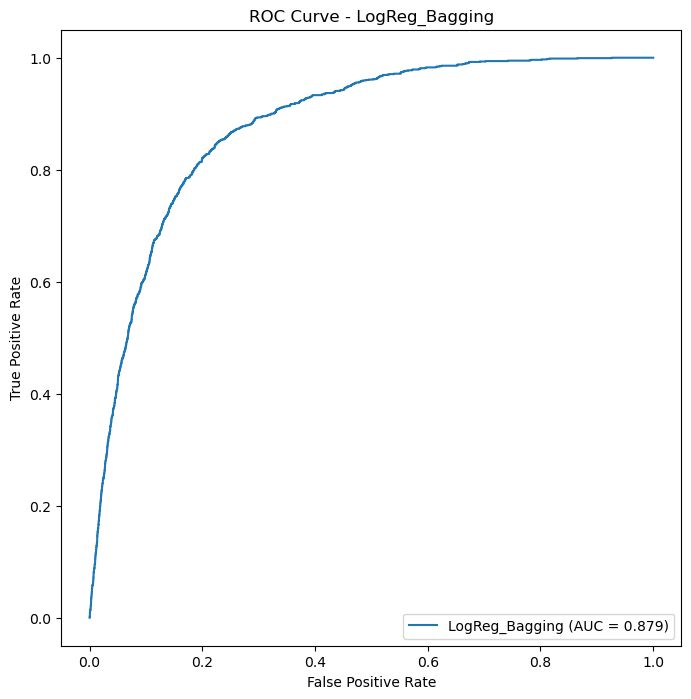

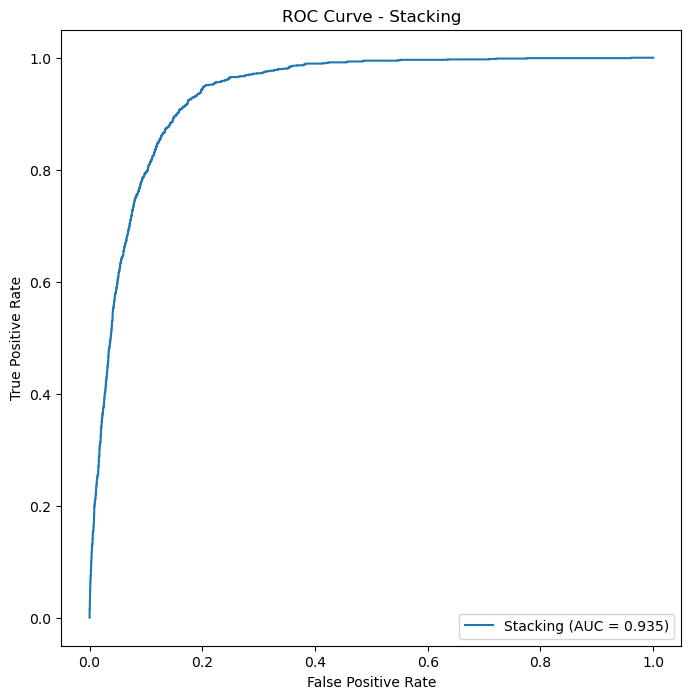

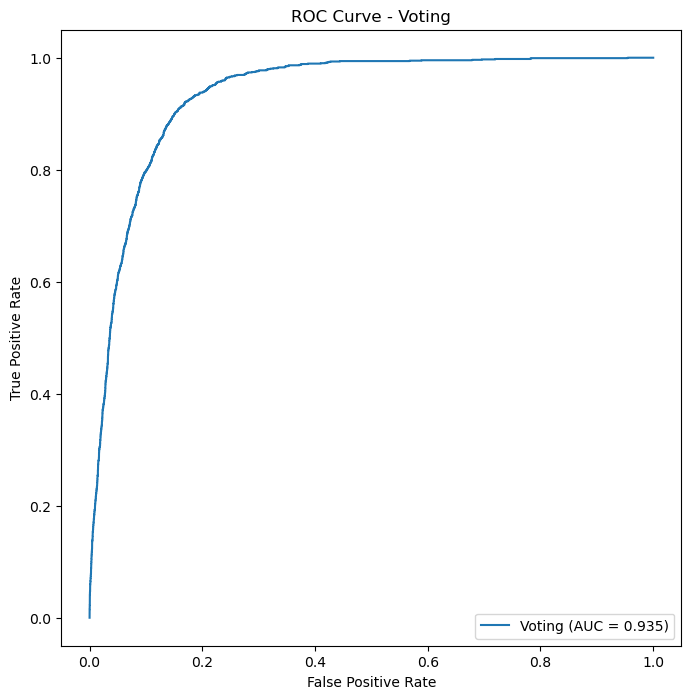

In [172]:

threshold_df = pd.DataFrame(columns=['Model', 'Best_Threshold'])

for model_name, model in models.items():
    
    best_params = {
        'RandomForest': {'n_estimators': 192, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 17, 'bootstrap': True},
        'GradientBoosting': {'n_estimators': 189, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1},
        'AdaBoost': {'n_estimators': 193, 'learning_rate': 0.3},
        'XGBoost': {'subsample': 0.8, 'n_estimators': 138, 'min_child_weight': 8, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0},
        'KNN_Bagging': {'n_estimators': 15, 'max_samples': 0.8, 'max_features': 0.8, 'base_estimator__weights': 'distance', 'base_estimator__p': 1, 'base_estimator__n_neighbors': 12},
        'LogReg_Bagging': {'n_estimators': 15, 'max_samples': 1.0, 'max_features': 0.8, 'base_estimator__penalty': 'l2', 'base_estimator__C': 10},
        'Stacking': {'use_probas': True, 'meta_classifier__C': 0.001, 'average_probas': False},
        'Voting': {'voting': 'soft'}
    }[model_name]
    
    
    best_model = model.set_params(**best_params)
    
   
    best_model.fit(x_train, y_train)
    
   
    y_prob = best_model.predict_proba(x_test)[:, 1]
    

    fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
    

    auc_score = auc(fpr, tpr)
    
   
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    best_index = np.argmax(tpr - fpr)
    best_threshold_roc = thresholds_roc[best_index]
    
    
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
    
    
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_index_pr = np.argmax(f1_scores)
    best_threshold_pr = thresholds_pr[best_index_pr]
    
    
    if f1_scores[best_index_pr] > f1_scores[best_index]:
        best_threshold = best_threshold_pr
    else:
        best_threshold = best_threshold_roc
    
    
    threshold_df = threshold_df.append({'Model': model_name, 'Best_Threshold': best_threshold}, ignore_index=True)


In [173]:
threshold_df

,Model,Best_Threshold
0,RandomForest,0.264744
1,GradientBoosting,0.247492
2,AdaBoost,0.492994
3,XGBoost,0.237654
4,KNN_Bagging,0.086487
5,LogReg_Bagging,0.171363
6,Stacking,0.162597
7,Voting,0.306259


In [174]:

final_results_df = pd.DataFrame(columns=['Model', 'AUC_train', 'AUC_test', 'F1_train', 'F1_test', 'Model fitted with threshold'])

for model_name, model in models.items():
    
    best_params = {
        'RandomForest': {'n_estimators': 192, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 17, 'bootstrap': True},
        'GradientBoosting': {'n_estimators': 189, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1},
        'AdaBoost': {'n_estimators': 193, 'learning_rate': 0.3},
        'XGBoost': {'subsample': 0.8, 'n_estimators': 138, 'min_child_weight': 8, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0},
        'KNN_Bagging': {'n_estimators': 15, 'max_samples': 0.8, 'max_features': 0.8, 'base_estimator__weights': 'distance', 'base_estimator__p': 1, 'base_estimator__n_neighbors': 12},
        'LogReg_Bagging': {'n_estimators': 15, 'max_samples': 1.0, 'max_features': 0.8, 'base_estimator__penalty': 'l2', 'base_estimator__C': 10},
        'Stacking': {'use_probas': True, 'meta_classifier__C': 0.001, 'average_probas': False},
        'Voting': {'voting': 'soft'}
    }[model_name]
    
  
    best_model = model.set_params(**best_params)
    
   
    best_model.fit(x_train, y_train)
    
    
    y_prob = best_model.predict_proba(x_test)[:, 1]
    
   
    best_threshold = threshold_df.loc[threshold_df['Model'] == model_name, 'Best_Threshold'].values[0]
    y_pred_threshold = (y_prob >= best_threshold).astype(int)
    
   
    auc_train = roc_auc_score(y_train, best_model.predict_proba(x_train)[:, 1])
    auc_test = roc_auc_score(y_test, y_prob)
    f1_train = f1_score(y_train, best_model.predict(x_train))
    f1_test = f1_score(y_test, y_pred_threshold)
    
    
    final_results_df = final_results_df.append({
        'Model': model_name,
        'AUC_train': auc_train,
        'AUC_test': auc_test,
        'F1_train': f1_train,
        'F1_test': f1_test,
        'Model fitted with threshold': best_threshold
    }, ignore_index=True)


In [175]:
final_results_df

,Model,AUC_train,AUC_test,F1_train,F1_test,Model fitted with threshold
0,RandomForest,0.969832,0.929982,0.661361,0.617876,0.264744
1,GradientBoosting,0.962186,0.934325,0.685463,0.629384,0.247492
2,AdaBoost,0.913189,0.912213,0.436303,0.580589,0.492994
3,XGBoost,0.980263,0.932921,0.787296,0.636760,0.237654
4,KNN_Bagging,0.999912,0.853384,0.938666,0.434080,0.086487
5,LogReg_Bagging,0.872270,0.879359,0.247673,0.532780,0.171363
6,Stacking,0.999257,0.934531,0.817475,0.634100,0.162597
7,Voting,0.994440,0.935039,0.837555,0.630515,0.306259


# Model Recommendation:
Considering both AUC and F1 scores, the Voting Classifier seems to be performing well.
It strikes a good balance between capturing positive instances (AUC) and achieving a balance between precision and recall (F1).
The model might be robust in handling the imbalanced nature of the dataset